In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/house_price_adv_regr.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence',  'MiscFeature', 'Id'], inplace = True)

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [8]:
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [9]:
X['GarageYrBlt'] = X['GarageYrBlt'].astype('int64')

In [10]:
years = [col for col in X.columns if col.startswith('Y') == True]
years.append('GarageYrBlt')

objects = [col for col in X.columns if X[col].dtypes == 'object']

integers = [col for col in X.columns if X[col].dtypes == 'int64' and col not in years]

floats = [col for col in X.columns if X[col].dtypes == 'float64']

In [11]:
X[integers].head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,8450,7,5,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,2
1,20,9600,6,8,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,5
2,60,11250,7,5,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,9
3,70,9550,7,5,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,2
4,60,14260,8,5,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,12


In [12]:
years

['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']

In [13]:
X[objects].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
for col in objects:
  print(col, X[col].nunique())

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 1
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 6
BldgType 5
HouseStyle 8
RoofStyle 5
RoofMatl 7
Exterior1st 14
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 4
Foundation 5
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 4
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 6
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


In [16]:
#!pip install category_encoders

In [17]:
import category_encoders as ce

In [18]:
oe = ce.OrdinalEncoder(cols = objects)

In [19]:
X = oe.fit_transform(X)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   int64  
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   int64  
 5   LotShape       1094 non-null   int64  
 6   LandContour    1094 non-null   int64  
 7   Utilities      1094 non-null   int64  
 8   LotConfig      1094 non-null   int64  
 9   LandSlope      1094 non-null   int64  
 10  Neighborhood   1094 non-null   int64  
 11  Condition1     1094 non-null   int64  
 12  Condition2     1094 non-null   int64  
 13  BldgType       1094 non-null   int64  
 14  HouseStyle     1094 non-null   int64  
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
def corr_df(df):
    fig = plt.figure(figsize = (25,25))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.show()



<ipython-input-33-118f0c8ebd74>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


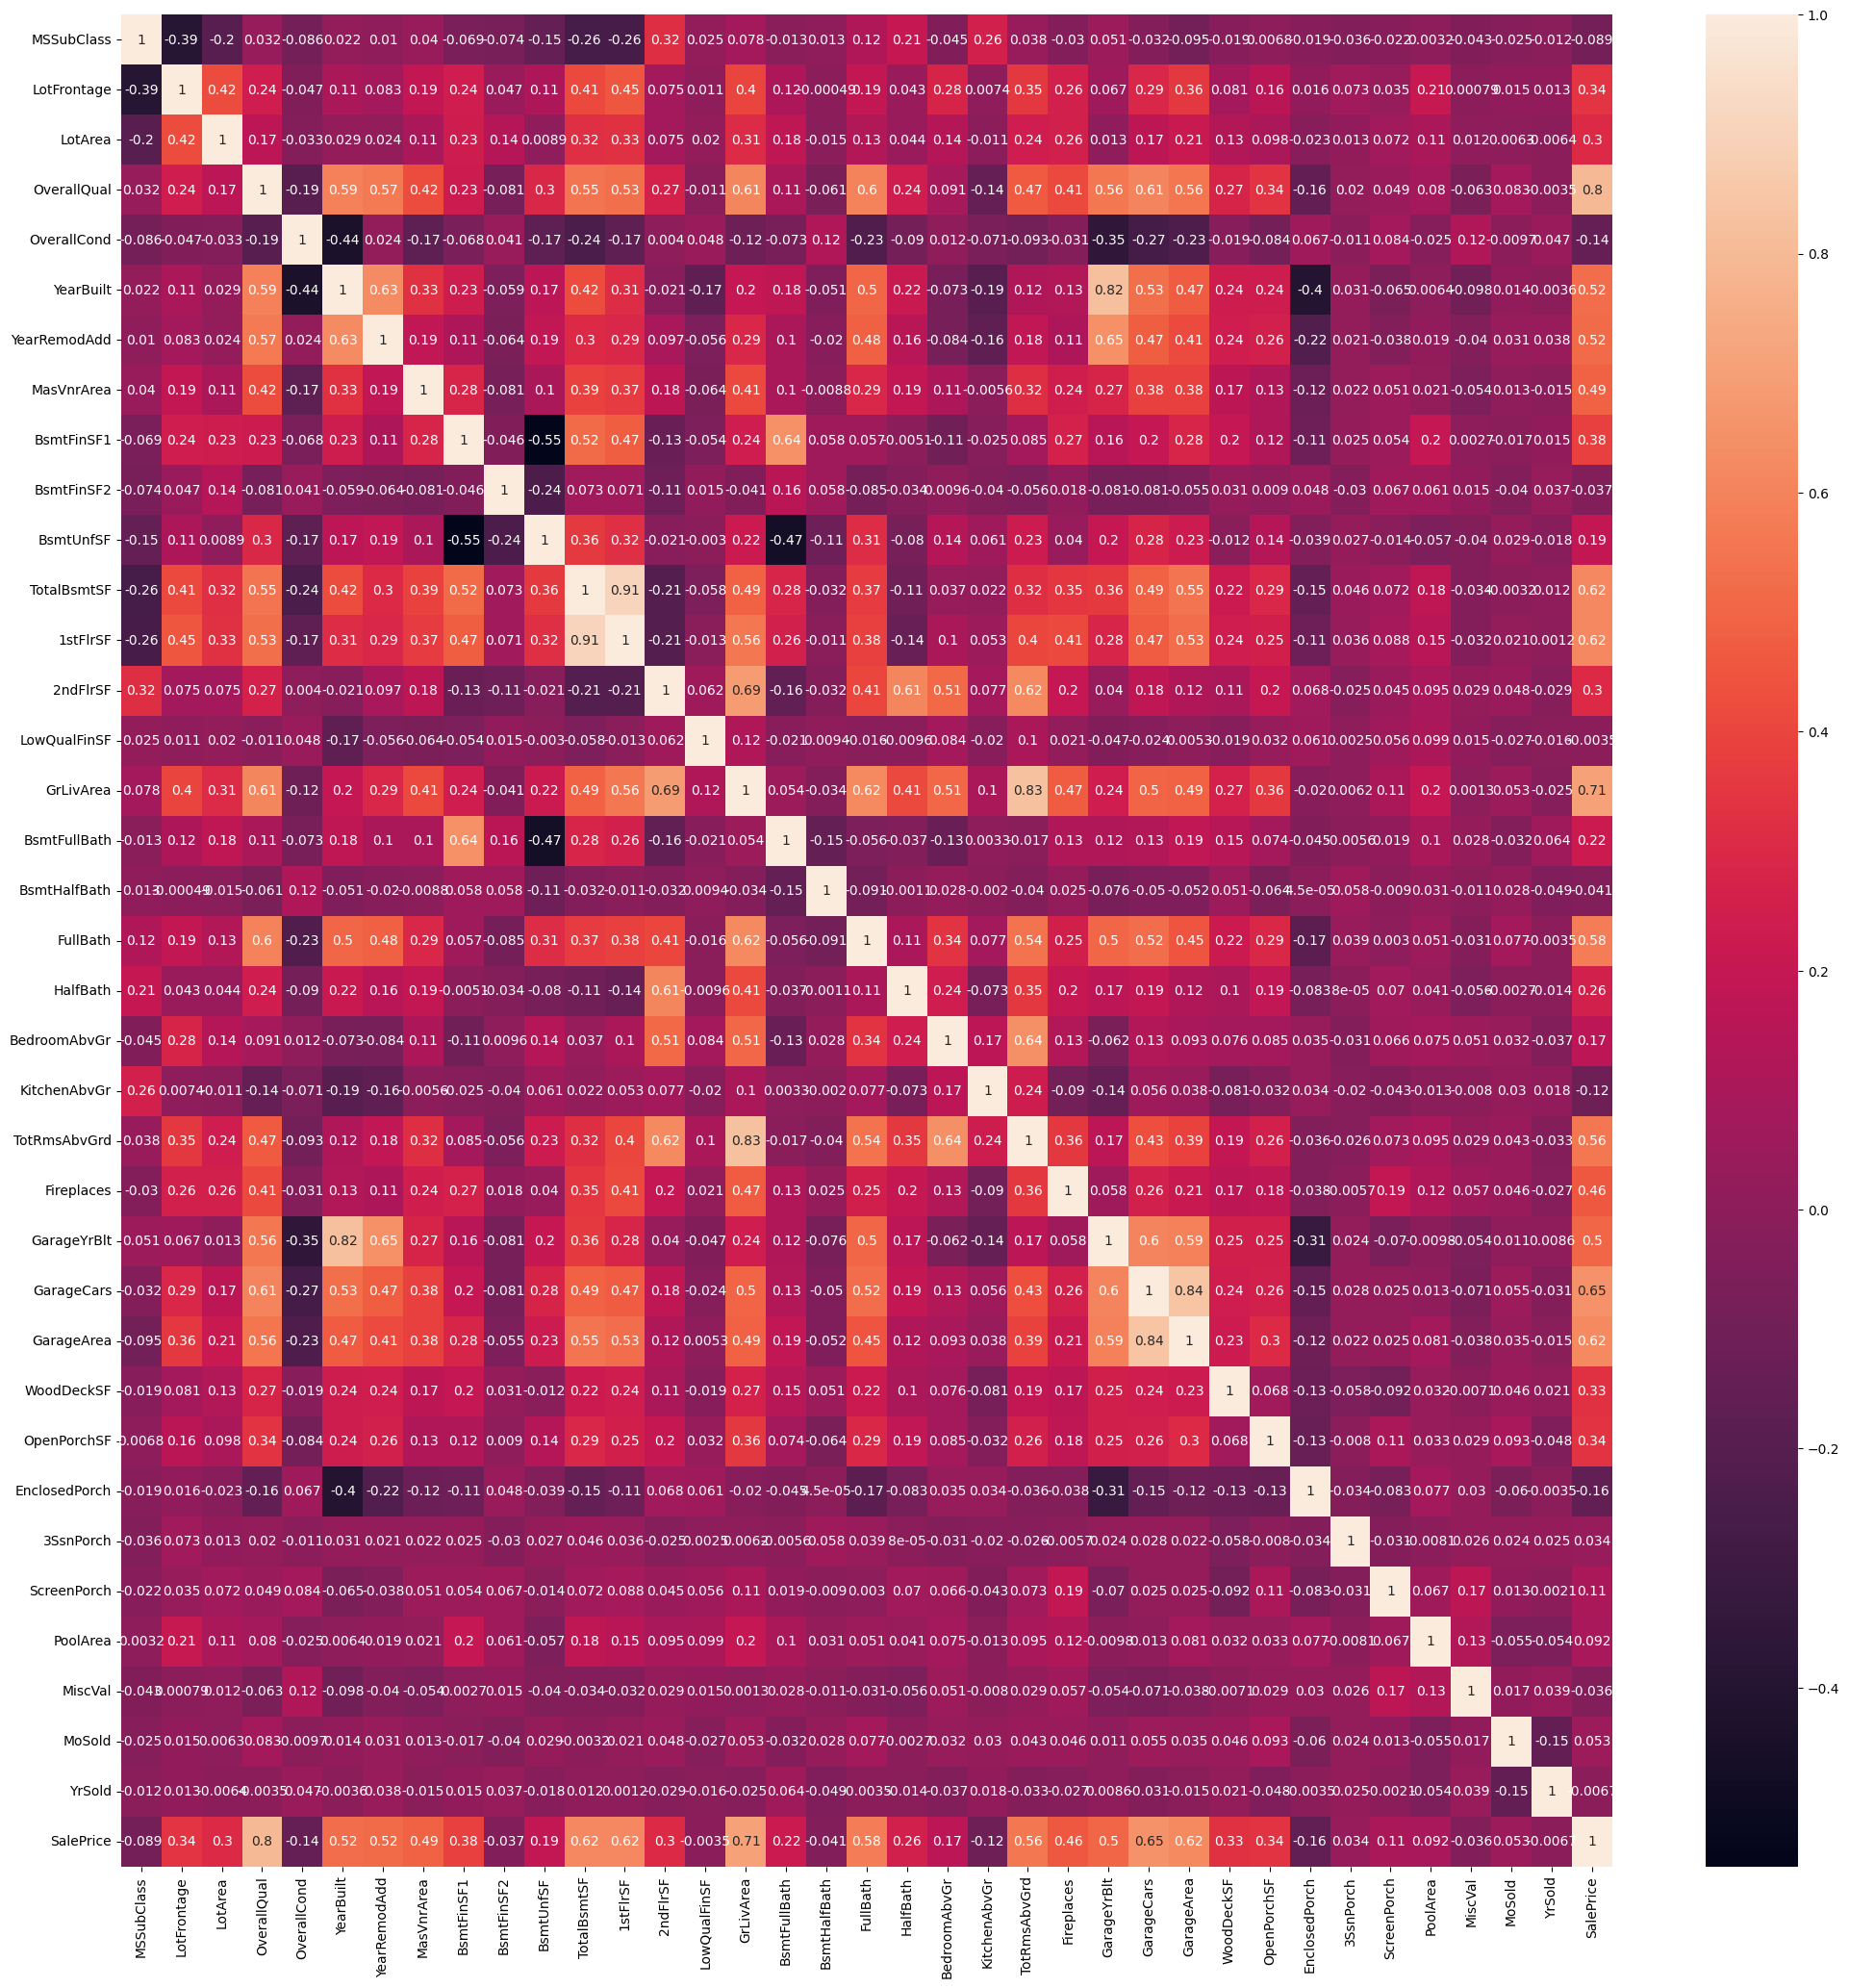

In [35]:
corr_df(df)

In [36]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.columns[i], '----', corr_matrix.iloc[i,j], '-----', corr_matrix.columns[j])

                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                #if colname in dataset.columns:
                    #del dataset[colname] # deleting the column from the dataset

    #return col_corr

In [37]:
correlation(df, 0.8)

1stFlrSF ---- 0.9068401499720542 ----- TotalBsmtSF
TotRmsAbvGrd ---- 0.8275137540929173 ----- GrLivArea
GarageYrBlt ---- 0.8241556506945853 ----- YearBuilt
GarageArea ---- 0.8407547049296185 ----- GarageCars


<ipython-input-36-da11345639d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [38]:
X.drop(columns = '1stFlrSF', inplace = True)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1)

In [28]:
X_train.shape

(885, 74)

In [29]:
X_test.shape

(110, 74)

In [30]:
X_val.shape

(99, 74)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [41]:
# baseline Model - RandomForestRegressor

In [42]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
y_pred_rf = rf.predict(X_test)

In [43]:
importances = rf.feature_importances_

In [46]:
indices = np.argsort(importances)[-30:]
features = X.columns

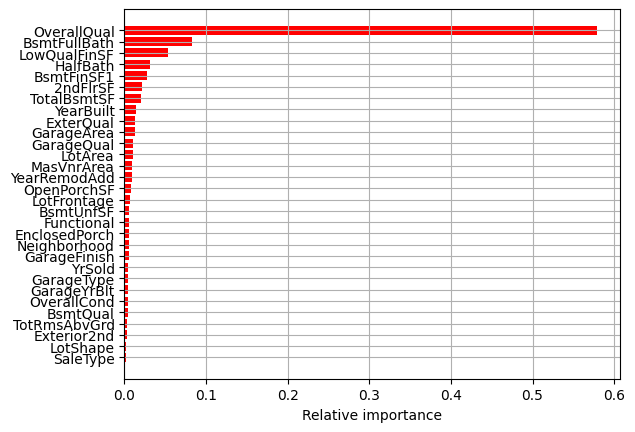

In [48]:
plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.grid()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print('MSE = ', mse)
  print('RMSE = ', rmse)
  print('MAE = ', mae)
  print('r2 = ', r2)

In [59]:
metrics(y_test, y_pred_rf)

MSE =  836340201.0454117
RMSE =  28919.547040806356
MAE =  19753.123
r2 =  0.8929698509241225


In [52]:
### GradientBoostingRegressor

In [64]:
gbr = GradientBoostingRegressor()

In [58]:
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [60]:
metrics(y_test, y_pred_gbr)

MSE =  640911819.8113639
RMSE =  25316.23628842494
MAE =  17108.39339134318
r2 =  0.9179796839454122


In [61]:
# Hyperparameter Tuning

In [63]:
params = {
    'learning_rate':[0.001, 0.01, 0.1],
    'n_estimators':[500, 1000, 2000],
    'max_depth':[5, 10, 15]
}

In [65]:
gbr = GradientBoostingRegressor()

In [70]:
gbr_tuned = GridSearchCV(gbr, params, cv = 5, scoring = 'neg_mean_squared_error')

In [72]:
#gbr_tuned.fit(X_train, y_train)

In [ ]:
# import sklearn

# sklearn.metrics.get_scorer_names()

In [ ]:
# Show selected params
gbr.best_params_

In [ ]:
gbr = GradientBoostingRegressor('gbr.best_params_')

In [ ]:
# preprocesare pt algoritmi numerici
# scalare, pd.get_dummies
# LinearRegression, SVR, KNN, ExtraTreesRegression